In [1]:
import numpy as np
import random

In [2]:
import tsplib95

In [3]:
with open('dj38.tsp') as f:
    problem = tsplib95.read(f)

In [4]:
problem.get_weight(2,2)

0

In [5]:
help(problem.get_weight)

Help on method get_weight in module tsplib95.models:

get_weight(start, end) method of tsplib95.models.StandardProblem instance
    Return the weight of the edge between start and end.

    This method provides a single way to obtain edge weights regardless of
    whether the problem uses an explicit matrix or a distance function.

    :param int start: starting node index
    :param int end: ending node index
    :return: weight of the edge between start and end
    :rtype: float



In [6]:
import random
def randomSolution(N): #number of row is number of population
    random_solution = random.sample(range(1,N+1), N)
    return random_solution

In [7]:
tst_sol = randomSolution(32)

In [8]:
np.argmax(tst_sol)

np.int64(18)

In [9]:
tst_sol[0]

1

In [10]:
def calcular_costo(solucion):
    totalCost = 0
    for i in range(len(solucion)):
        from_city = solucion[i] 
        to_city = None
        if i+1 < len(solucion):
            to_city = solucion[i+1]
        else:
            to_city = solucion[0]
        
        totalCost += problem.get_weight(from_city, to_city)
    
    return totalCost

In [11]:
import copy

In [12]:
def neighbors(solucion):
    N = len(solucion)
    lst_choices = [i for i in range(N)]
    idx1 = random.choice(lst_choices)
    lst_choices.remove(idx1)
    idx2 = random.choice(lst_choices)

    vecino = copy.deepcopy(solucion)
    vecino[idx1] = solucion[idx2]
    vecino[idx2] = solucion[idx1]
    return vecino, solucion[idx2],solucion[idx1]

In [13]:
def tabu_search(max_iterations, permanencia, tamaño_vecindad, n):
    sol_inicial = randomSolution(n)
    sol_actual = sol_inicial
    costo_actual = calcular_costo(sol_actual)
    
    scores = [costo_actual]
    solutions = [sol_actual]
    
    tabu_list = {}
    k = 0
    
    while k <= max_iterations:
        vecinos = []
        costos = []
        movimientos = []
        best_historical_score = min(scores)
        
        # Generar vecindad sin repeticiones
        while len(vecinos) < tamaño_vecindad:
            vecino, val1, val2 = neighbors(sol_actual)
            if vecino not in vecinos:
                costo_vecino = calcular_costo(vecino)
                vecinos.append(vecino)
                costos.append(costo_vecino)
                movimientos.append((val1, val2))

        # Encontrar el mejor vecino
        idx_mejor = np.argmin(costos)
        mejor_vecino = vecinos[idx_mejor]
        mejor_costo = costos[idx_mejor]
        movimiento = movimientos[idx_mejor]
        
        # Criterios de aceptación
        if (movimiento not in tabu_list) and (mejor_costo < costo_actual):
            sol_actual = mejor_vecino
            costo_actual = mejor_costo
        elif (movimiento in tabu_list) and (mejor_costo < best_historical_score):
            sol_actual = mejor_vecino
            costo_actual = mejor_costo
        else:
            # Si no se cumple ningún criterio, no se cambia la solución
            pass
        
        scores.append(costo_actual)
        solutions.append(sol_actual)

        # Actualizar lista tabu
        tabu_list = {mov: dur - 1 for mov, dur in tabu_list.items() if dur > 1}
        tabu_list[movimiento] = permanencia

        k += 1

    return solutions, scores


In [14]:
#Optimal Value:  6656

In [15]:
iteraciones = 2500
permanencia = 2
tamaño_vecindad = 150

In [21]:
from timeit import default_timer as timer
start = timer()
sol_lst, scores_lst = tabu_search(iteraciones, permanencia ,tamaño_vecindad,38 )
print('Mejor Solución:',sol_lst[np.argmin(scores_lst)])
print('Costo de la Mejor Solución:',scores_lst[np.argmin(scores_lst)])
stop = timer()
execution_time = stop - start
print(execution_time)

Mejor Solución: [22, 23, 25, 26, 29, 21, 14, 10, 1, 2, 4, 6, 7, 13, 15, 20, 30, 32, 35, 19, 18, 17, 16, 38, 37, 24, 9, 8, 3, 5, 12, 11, 27, 31, 36, 34, 33, 28]
Costo de la Mejor Solución: 10379
120.75609480001731


In [23]:
len(sol_lst[np.argmin(scores_lst)])

38

In [27]:
import matplotlib.pyplot as plt

def plot_route(best_solution):
    xs = [problem.node_coords[i][0] for i in best_solution]
    ys = [problem.node_coords[i][1] for i in best_solution]
    plt.clf()
    # 'bo-' means blue color, round points, solid lines
    plt.plot(xs,ys,'y--')
    plt.title('Mejor Solución Busqueda Tabú')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.show()

In [25]:
bst_all = sol_lst[np.argmin(scores_lst)]

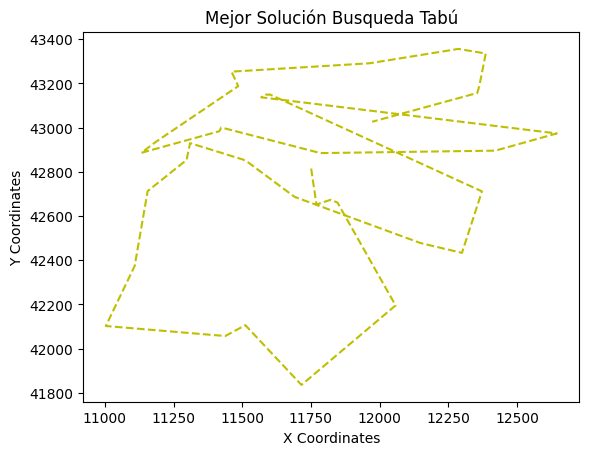

In [28]:
plot_route(bst_all)